# Feed Forward Neural Network on Fashion MNIST
---
Don't forget to use **https://pytorch.org/docs/stable/**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

---

## Prepare Fashion MNIST dataset
We want to preprocess training data, specifically to have flatten shape `(28, 28) -> 784` in `torch.Tensor` format.

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Compose
from torch.utils.data import DataLoader

In [3]:
class ReshapeTransform:
    def __init__(self, new_size=(-1,)):
        self.new_size = new_size

    def __call__(self, sample):
        return torch.reshape(sample, self.new_size)

In [4]:
transformations = Compose([ToTensor(), ReshapeTransform()])

In [5]:
train_dataset = FashionMNIST('./dataset_fashion_mnist/', download=True, train=True, transform=transformations, target_transform=None)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

valid_dataset = FashionMNIST('./dataset_fashion_mnist/', download=True, train=False, transform=transformations, target_transform=None)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=False)

In [6]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

In [7]:
next(iter(train_loader))

[tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.1098, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]),
 tensor([3, 7, 0, 4, 6, 0, 5, 2, 1, 7, 7, 9, 5, 3, 4, 2, 1, 3, 3, 9, 5, 2, 5, 0,
         4, 2, 1, 4, 1, 3, 7, 0, 9, 7, 8, 8, 5, 6, 7, 0, 1, 7, 7, 4, 3, 7, 1, 7,
         3, 3, 8, 3, 7, 9, 6, 0, 5, 2, 4, 6, 4, 3, 8, 0])]

---

## Define feed forward neural network
In case we use `torch.nn` modules, we don't need to register tensor with `torch.nn.Parameter`.   

**Important:** Don't forget to setup `.eval()` or `.train()` modes for model to enforce proper behaviour of certain layers as `torch.nn.Dropout` or `torch.nn.BatchNorm1d`.

### Architecture

In [8]:
from torch.nn import Module
from torch.nn import ReLU, Tanh, Dropout, Softmax, Linear, BatchNorm1d
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim import Adam, SGD
from torch.nn.init import xavier_uniform_, normal_

In [9]:
class FeedForwardNeuralNet(torch.nn.Module):
    def __init__(self):
        super(FeedForwardNeuralNet, self).__init__()
        
        self.layer_1 = Linear(784, 64)
        self.layer_2 = Linear(64, 10)
        xavier_uniform_(self.layer_1.weight)
        
        self.batch_norm_layer_1 = BatchNorm1d(64)
        self.dropout = Dropout(p=0.1)

        
    def forward(self, input_batch):
        prediction = self.layer_1(input_batch)
        prediction = torch.relu(prediction)
        prediction = self.batch_norm_layer_1(prediction)
        prediction = self.dropout(prediction)
        prediction = self.layer_2(prediction)
        return torch.softmax(prediction, dim=1)
        # return torch.log_softmax(prediction, dim=1) -> torch.exp(prediction)

In [10]:
feed_forward_neural_net = FeedForwardNeuralNet()

In [11]:
feed_forward_neural_net

FeedForwardNeuralNet(
  (layer_1): Linear(in_features=784, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=10, bias=True)
  (batch_norm_layer_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1)
)

In [12]:
feed_forward_neural_net.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0464, -0.0537,  0.0449,  ...,  0.0170,  0.0172, -0.0362],
                      [ 0.0468, -0.0799, -0.0395,  ...,  0.0354, -0.0830, -0.0322],
                      [-0.0374, -0.0489, -0.0577,  ...,  0.0440, -0.0036, -0.0526],
                      ...,
                      [ 0.0097, -0.0681,  0.0388,  ...,  0.0215, -0.0396, -0.0171],
                      [ 0.0077, -0.0384,  0.0822,  ...,  0.0598,  0.0393, -0.0059],
                      [ 0.0445,  0.0147, -0.0569,  ..., -0.0412, -0.0471, -0.0695]])),
             ('layer_1.bias',
              tensor([-0.0200, -0.0242, -0.0144, -0.0094,  0.0103, -0.0284,  0.0018,  0.0256,
                       0.0033,  0.0108, -0.0090,  0.0332,  0.0153, -0.0054, -0.0145, -0.0327,
                       0.0080,  0.0103,  0.0187,  0.0279, -0.0045, -0.0125,  0.0264, -0.0329,
                      -0.0195,  0.0246,  0.0247, -0.0128,  0.0284, -0.0320, -0.0230, -0.0146,
                      -0.007

In [14]:
images, labels = next(iter(valid_loader))

In [15]:
feed_forward_neural_net.eval()
predictions = feed_forward_neural_net(images)
feed_forward_neural_net.train()
predictions[:4]

tensor([[0.0975, 0.0998, 0.1022, 0.0910, 0.0956, 0.0974, 0.0995, 0.1187, 0.0998,
         0.0984],
        [0.1162, 0.1052, 0.1184, 0.1117, 0.0885, 0.0834, 0.0973, 0.1096, 0.0866,
         0.0831],
        [0.1218, 0.0952, 0.1037, 0.0894, 0.1053, 0.0846, 0.0979, 0.0955, 0.1022,
         0.1043],
        [0.1169, 0.1038, 0.1101, 0.0967, 0.1034, 0.0960, 0.1003, 0.0898, 0.0908,
         0.0922]], grad_fn=<SliceBackward>)

### Optimizers and loss function

In [16]:
loss_fce = CrossEntropyLoss()
loss_fce

CrossEntropyLoss()

In [17]:
loss_fce(predictions, labels)

tensor(2.3010, grad_fn=<NllLossBackward>)

In [18]:
#optimizer = SGD(feed_forward_neural_net.parameters(), lr=0.1)
optimizer = Adam(feed_forward_neural_net.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

### Training of neural net

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def get_valid_acc_and_loss(model, loss_fce, valid_loader):
    accuracy = 0
    loss = 0
    was_training = model.training
    
    model.eval()
    for images, labels in valid_loader:
        predictions = model(images)
        accuracy += (predictions.argmax(dim=1) == labels).type(torch.FloatTensor).mean().item() 
        loss += loss_fce(predictions, labels).item()
    model.train(mode=was_training)
    return accuracy / len(valid_loader) * 100, loss / len(valid_loader)

In [23]:
get_valid_acc_and_loss(feed_forward_neural_net, loss_fce, valid_loader)

(12.400477707006369, 2.300411553899194)

In [24]:
from collections import deque

# Initial params setup.
epochs = 2
report_period = 100
batch_iteration = 0

# Storing of some data.
train_leak_loss = deque(maxlen=report_period)
train_loss_history = []
valid_loss_history = []
valid_acc_history = []

In [26]:
for epoch in range(epochs):
    # Setup net to train mode and go through one epoch.
    feed_forward_neural_net.train()
    for images, labels in train_loader:
        batch_iteration += 1
        
        ##################
        # Training Phase #
        ##################
        optimizer.zero_grad()
        predictions = feed_forward_neural_net.forward(images)
        loss = loss_fce(predictions, labels)
        loss.backward()
        optimizer.step()
        
        ####################
        # Validation Phase #
        ####################
        train_leak_loss.append(loss.item())
        if batch_iteration % report_period == 0:
            feed_forward_neural_net.eval()
            
            # We don't want to collect info for gradients from here.
            with torch.no_grad():
                valid_accuracy, valid_loss = get_valid_acc_and_loss(feed_forward_neural_net, loss_fce, valid_loader)
                
            print(f'Epoch: {epoch+1}/{epochs}.. ',
                  f"Train Loss: {round(np.mean(train_leak_loss), 2)}.. ",
                  f"Valid Loss: {round(valid_loss, 2)}.. ",
                  f"Valid Acc: {round(valid_accuracy, 2)}%")
            
            train_loss_history.append(np.mean(train_leak_loss))
            valid_loss_history.append(valid_loss)
            valid_acc_history.append(valid_accuracy)
                   
            feed_forward_neural_net.train()

Epoch: 1/2..  Train Loss: 2.02..  Valid Loss: 1.84..  Valid Acc: 74.26%
Epoch: 1/2..  Train Loss: 1.77..  Valid Loss: 1.73..  Valid Acc: 77.38%
Epoch: 1/2..  Train Loss: 1.7..  Valid Loss: 1.69..  Valid Acc: 81.51%
Epoch: 1/2..  Train Loss: 1.66..  Valid Loss: 1.66..  Valid Acc: 82.18%
Epoch: 1/2..  Train Loss: 1.65..  Valid Loss: 1.66..  Valid Acc: 81.96%
Epoch: 1/2..  Train Loss: 1.65..  Valid Loss: 1.65..  Valid Acc: 82.57%
Epoch: 1/2..  Train Loss: 1.64..  Valid Loss: 1.64..  Valid Acc: 83.63%
Epoch: 1/2..  Train Loss: 1.64..  Valid Loss: 1.66..  Valid Acc: 81.0%
Epoch: 1/2..  Train Loss: 1.64..  Valid Loss: 1.65..  Valid Acc: 82.38%
Epoch: 2/2..  Train Loss: 1.63..  Valid Loss: 1.64..  Valid Acc: 82.82%
Epoch: 2/2..  Train Loss: 1.62..  Valid Loss: 1.64..  Valid Acc: 83.19%
Epoch: 2/2..  Train Loss: 1.63..  Valid Loss: 1.63..  Valid Acc: 83.69%
Epoch: 2/2..  Train Loss: 1.62..  Valid Loss: 1.63..  Valid Acc: 84.32%
Epoch: 2/2..  Train Loss: 1.62..  Valid Loss: 1.63..  Valid Acc: 8

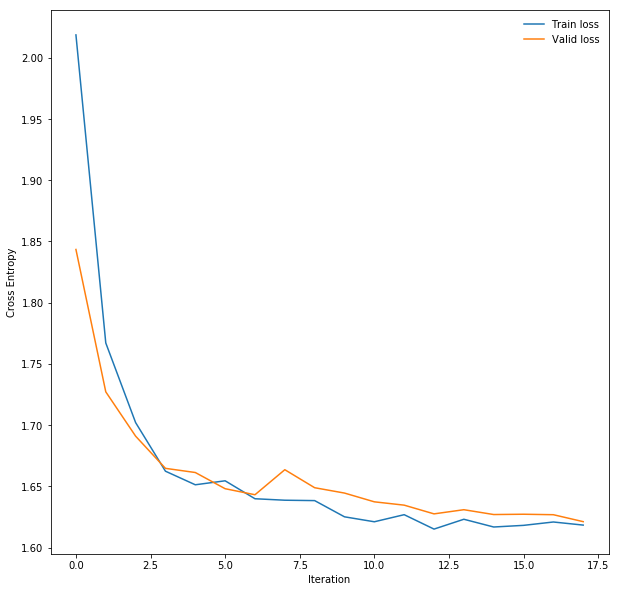

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xlabel('Iteration')
ax.set_ylabel('Cross Entropy')
plt.plot(train_loss_history, label='Train loss')
plt.plot(valid_loss_history, label='Valid loss')
plt.legend(frameon=False)

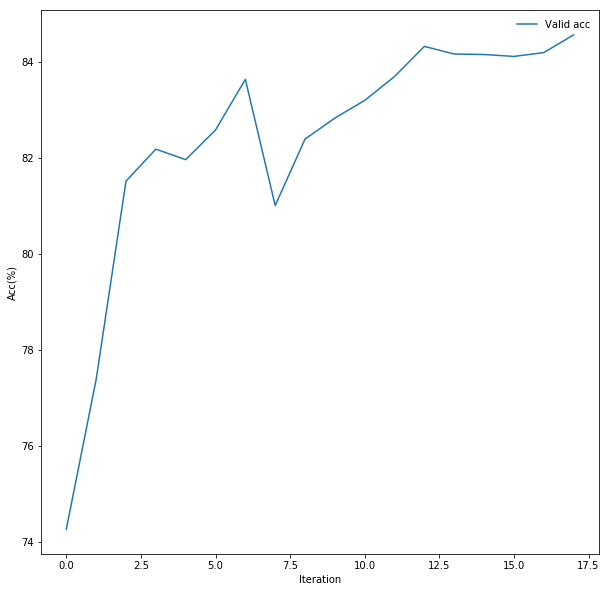

In [28]:
fig = plt.figure(figsize=(10, 10))
plt.plot(valid_acc_history, label='Valid acc')
ax = plt.gca()
ax.set_xlabel('Iteration')
ax.set_ylabel('Acc(%)')
plt.legend(frameon=False)

---

## Results evaluation

In [29]:
feed_forward_neural_net.eval()

FeedForwardNeuralNet(
  (layer_1): Linear(in_features=784, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=10, bias=True)
  (batch_norm_layer_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1)
)

### View single images and predictions

In [30]:
from image_processing_workshop.visual import plot_classify, plot_image

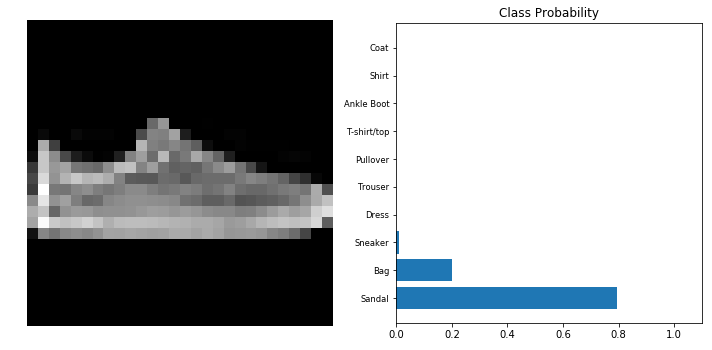

In [32]:
plot_classify(input_tensor=valid_dataset[12][0], 
              model=feed_forward_neural_net, image_shape=[28,28])

### Load reuslts to pandas df

In [34]:
from image_processing_workshop.eval import get_results_df
from image_processing_workshop.visual import plot_df_examples

In [35]:
df = get_results_df(feed_forward_neural_net, valid_loader)
df.head(10)

,label_class_name,label_class_score,predicted_class_name_top1,predicted_class_score_top1,image
0,Ankle boot,0.930887,Ankle boot,0.930887,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Pullover,0.999380,Pullover,0.999380,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Trouser,0.999975,Trouser,0.999975,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003..."
3,Trouser,0.999880,Trouser,0.999880,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Shirt,0.999657,Shirt,0.999657,"[0.0, 0.0, 0.0, 0.007843137718737125, 0.0, 0.0..."
5,Trouser,0.999783,Trouser,0.999783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,Coat,1.000000,Coat,1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003..."
7,Shirt,0.999481,Shirt,0.999481,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007..."
8,Sandal,0.998067,Sandal,0.998067,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,Sneaker,0.999663,Sneaker,0.999663,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


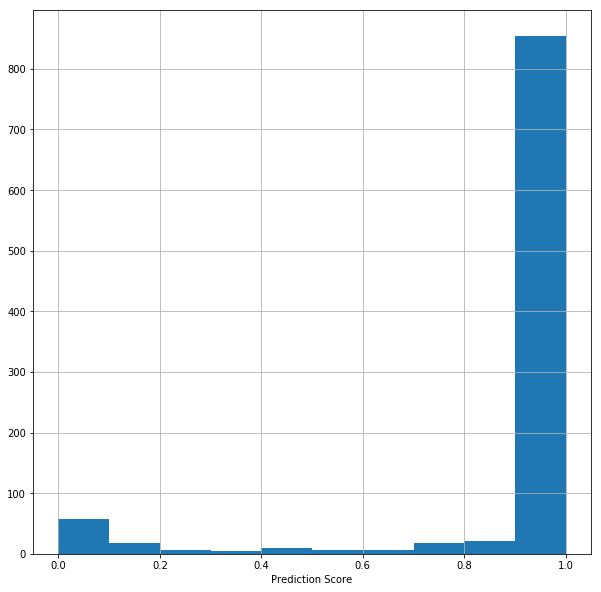

In [36]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xlabel('Prediction Score')
df[df.label_class_name=='Dress'].label_class_score.hist(ax=ax)

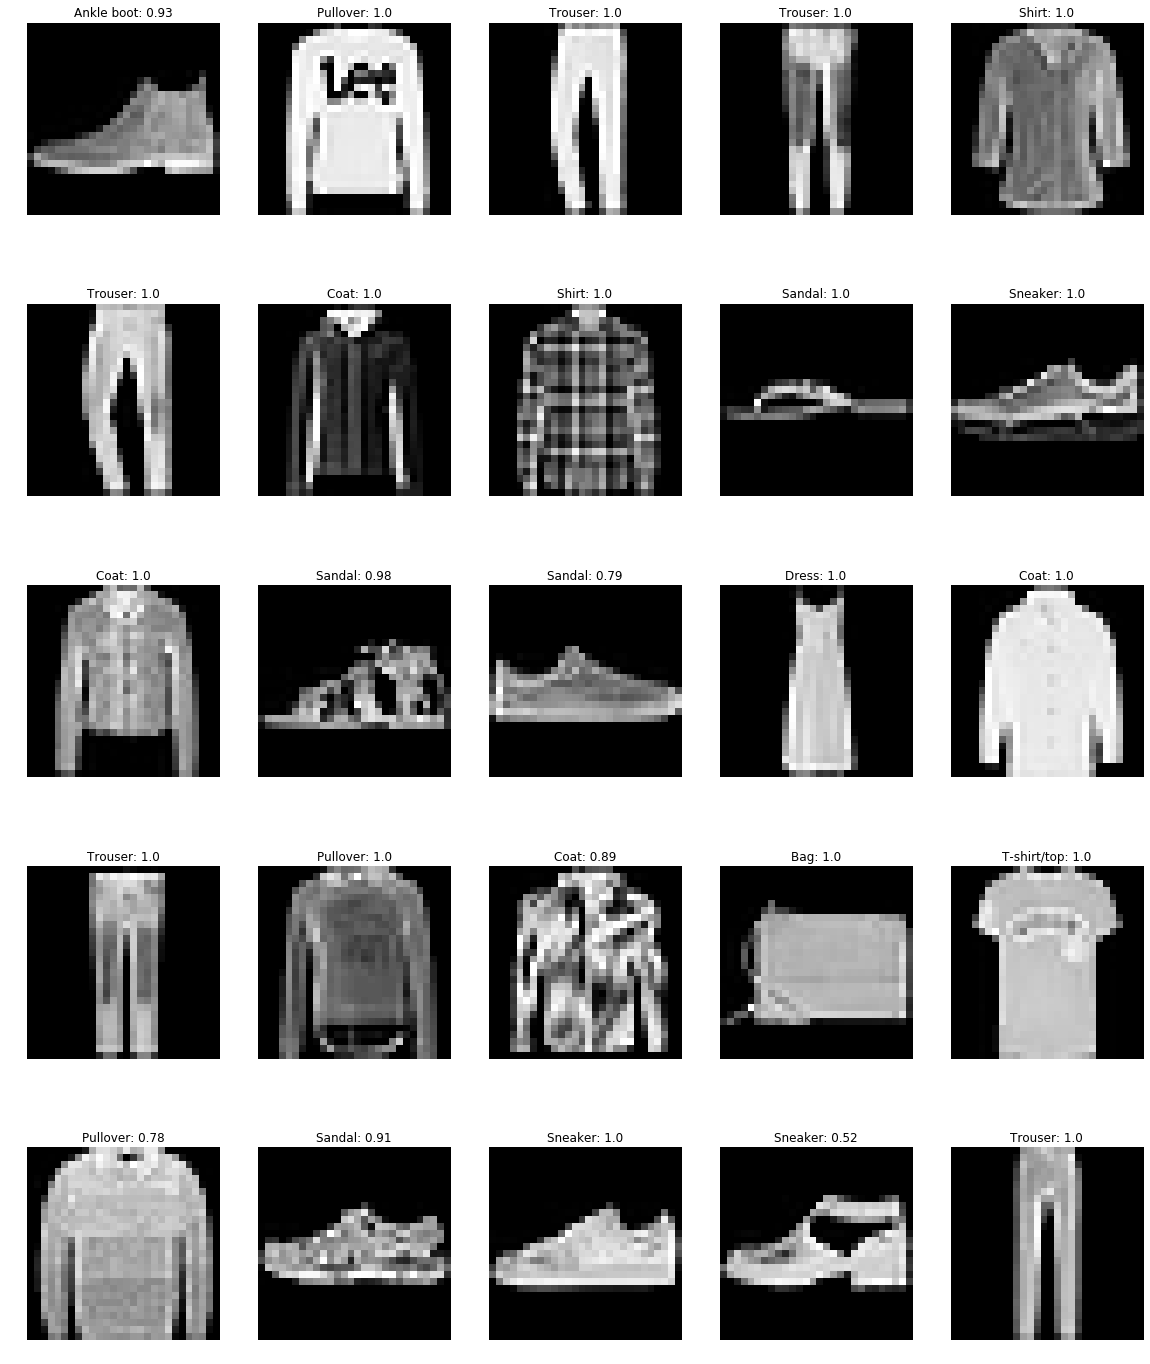

In [38]:
plot_df_examples(df.iloc[:25], image_shape=[28, 28])

### Precision

In [39]:
from image_processing_workshop.eval import get_precision

In [40]:
get_precision(df, 'Dress')

76.71

### Recall

In [41]:
from image_processing_workshop.eval import get_recall

In [42]:
get_recall(df, 'Dress')

90.9

### Overall Recall and Precision

In [43]:
from image_processing_workshop.eval import get_rec_prec

In [44]:
get_rec_prec(df)

,class_name,recall,precision
0,T-shirt/top,83.5,79.22
1,Trouser,95.2,98.96
2,Pullover,58.8,84.48
3,Dress,90.9,76.71
4,Coat,80.3,68.69
5,Sandal,91.8,94.93
6,Shirt,56.9,62.80
7,Sneaker,93.4,91.21
8,Bag,96.5,94.24
9,Ankle boot,94.8,93.58


### Accuracy

In [45]:
from image_processing_workshop.eval import get_accuracy

In [46]:
get_accuracy(df)

84.21

### False Positives

In [47]:
from image_processing_workshop.eval import get_false_positives

In [48]:
fp = get_false_positives(df, label_class_name='Shirt')

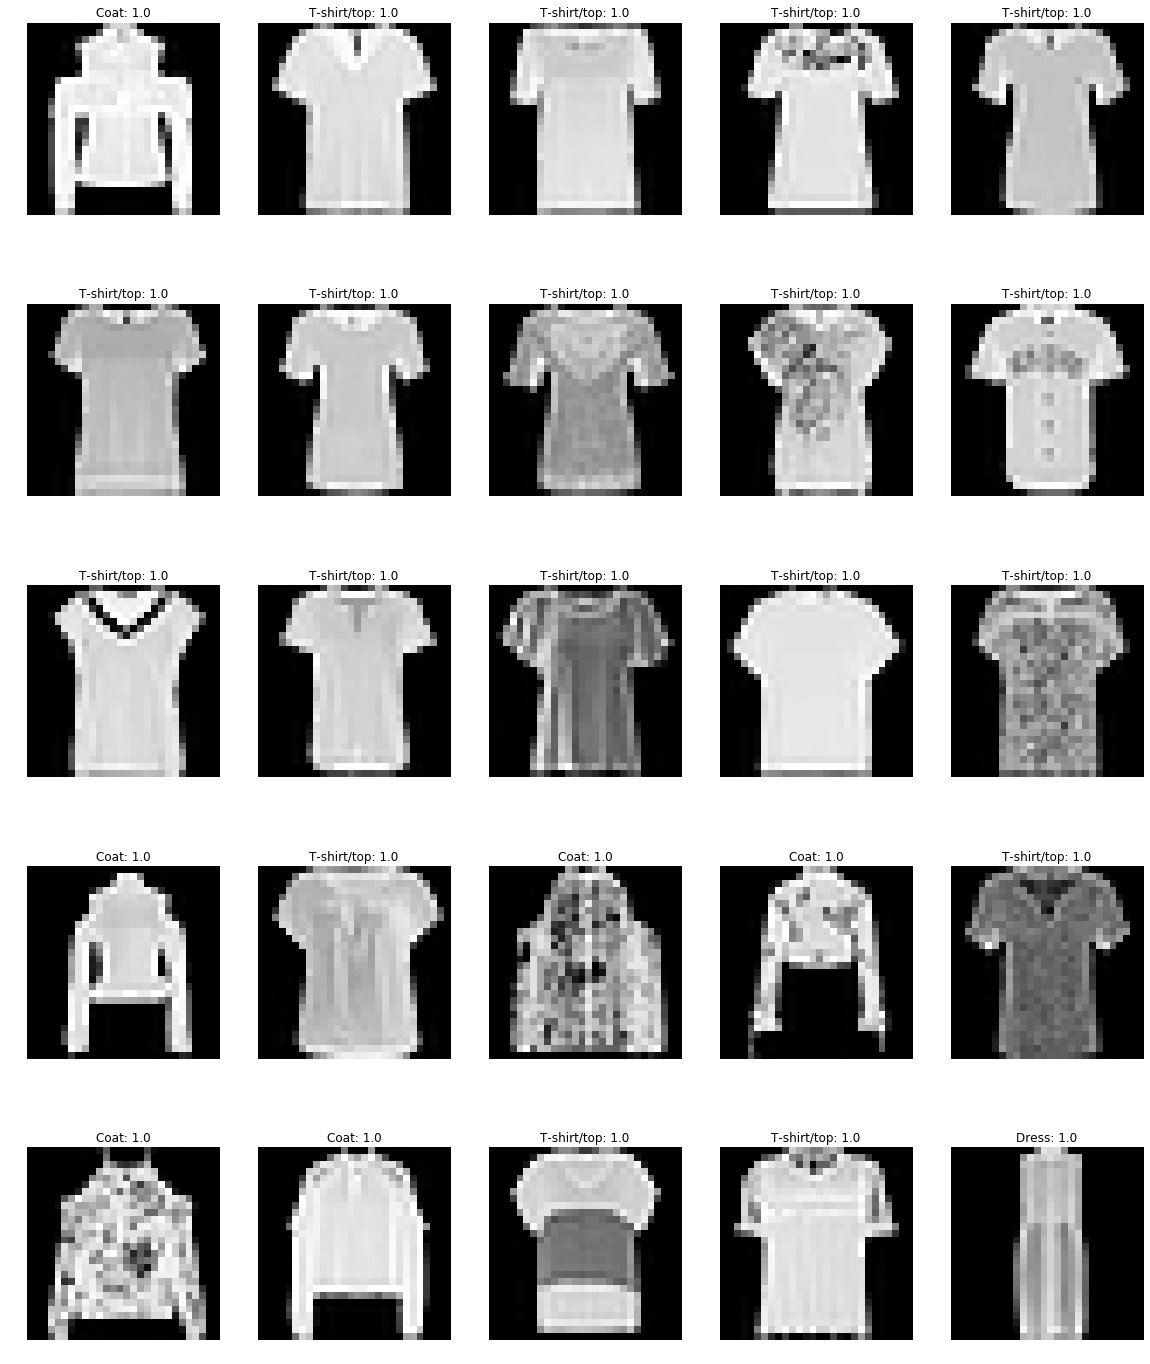

In [49]:
plot_df_examples(fp, image_shape=[28, 28])

In [50]:
fp = get_false_positives(df, label_class_name='Shirt', predicted_class_name='Pullover')

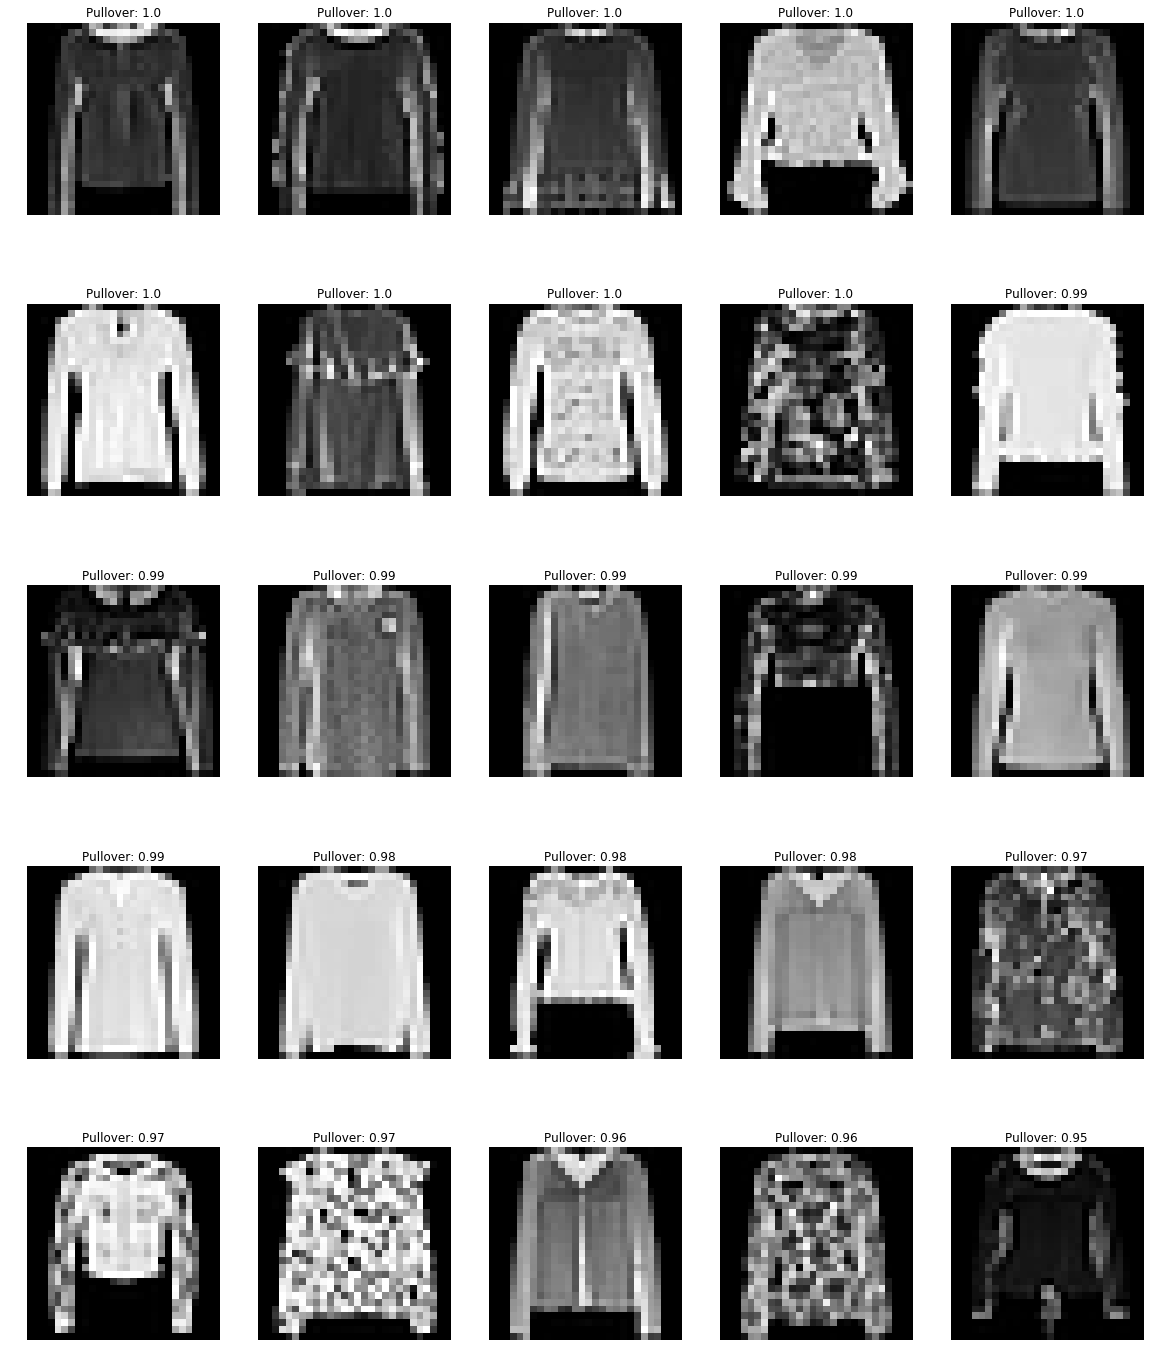

In [51]:
plot_df_examples(fp, image_shape=[28, 28])

### Confusion Matrix

In [52]:
from image_processing_workshop.visual import plot_coocurance_matrix

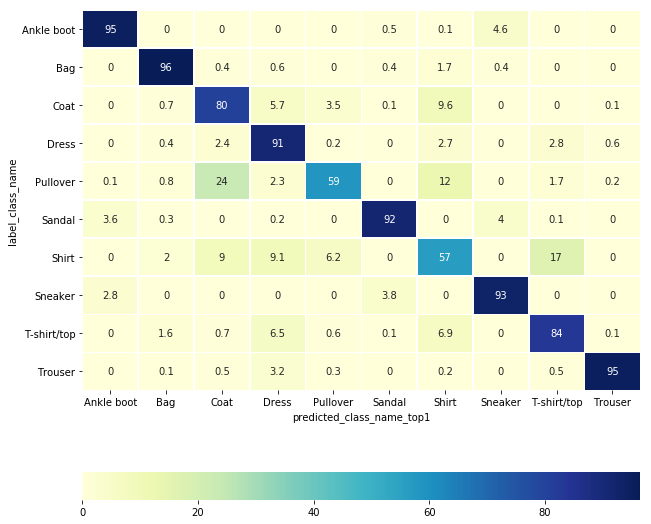

In [53]:
plot_coocurance_matrix(df, use_log=False)